# Exploración y visualización de datos data_fight

En este cuaderno se realizará una exploración exhaustiva del dataset: https://huggingface.co/datasets/DanJoshua/RWF-2000, el cual contiene dos categorías:
- **NonFight:** videos sin peleas.
- **Fight:** videos de peleas.

Los pasos que se llevarán a cabo son:
(Se presupone que el dataset esta subido al colab en content)
1. Explorar la estructura de carpetas y listar los archivos.
2. Extraer metadatos de cada video:
   - Resolución (ancho y alto).
   - Frames por segundo (fps).
   - Número de frames.
   - Duración (en segundos).
   - Tamaño del archivo.
3. Organizar la información en un DataFrame para realizar análisis estadísticos.
4. Visualizar la distribución de duraciones y resoluciones mediante gráficas.
5. Extraer y mostrar frames de ejemplo de algunos videos por categoría.

In [ ]:
# Instalamos opencv-python para el procesamiento de video.
!pip install --upgrade gdown opencv-python-headless

## Paso 1: Explorar la estructura de carpetas y listar los archivos


In [ ]:
import os

# Lista de rutas de los datasets
datasets = [
    '/content/Normal_Videos_for_Event_Recognition',
    '/content/Fight'
]

# Iteramos sobre cada dataset y mostramos su estructura de carpetas y archivos
for dataset_dir in datasets:
    print("=" * 50)
    print(f"Estructura de carpetas y archivos en el dataset: {dataset_dir}")

    for root, dirs, files in os.walk(dataset_dir):
        # Calculamos el nivel de profundidad para establecer la indentación
        level = root.replace(dataset_dir, '').count(os.sep)
        indent = ' ' * 4 * level
        print(f"{indent}{os.path.basename(root)}/")
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print(f"{subindent}{f}")

Estructura de carpetas y archivos en el dataset: /content/Normal_Videos_for_Event_Recognition
Normal_Videos_for_Event_Recognition/
    0TFi8D8IBg4_0.avi
    K4700BuM_0.avi
    14YZVngQ_0.avi
    8SWZq5we_fk_0.avi
    Pe1uIhp4dAQ_1.avi
    6n48sGUq_0.avi
    eNoGYdL1_0.avi
    mHY487R6_0.avi
    l4gqDHx9_dI_1.avi
    aGfwZ3E4_0.avi
    pr8yRPMO_0.avi
    Fds7C6sp_0.avi
    4p2iGvo8_0.avi
    1W8hsVvyKt4_3.avi
    cURNFrn5_0.avi
    ootage (_TwPzPRK7dc)_0.avi
    D6cjNRiP_0.avi
    mRqg-WXiR7Q_0.avi
    qrWTk-2a13o_0.avi
    gR4OsEPl894_2.avi
    cAp5A44HRS8_1.avi
    JsjF2OSJ_0.avi
    5RayT2Vy0EA_0.avi
    iE9hzgQD_0.avi
    RGIpCpdlzI8_1.avi
    HAoCHqFV_0.avi
    3Vw7MoNBgx4_0.avi
    1QixA5m2_0.avi
    fO2vb61DcUk_0.avi
    gBBRxXBI_0.avi
    oDGm-DOOyI4_1.avi
    JwTPruSFTjk_0.avi
    oMZpqizQ_0.avi
    FB3eqRE8_0.avi
    fwEk96k8g_I_1.avi
    CqJB8ZWLZ-o_1.avi
    BOnEkkm1_0.avi
    8s3rES1a_0.avi
    PaTrwJbs_0.avi
    qEeRHumV_0.avi
    9JxNZtUK_0.avi
    dOM7frJMFbc_1.avi
    c

## Paso 2: Extraer metadatos de cada video

In [ ]:
import cv2
import pandas as pd

# Definir las rutas de las carpetas directamente en el directorio raíz
normal_folder = '/content/Normal_Videos_for_Event_Recognition'
fight_folder = '/content/Fight'  # Actualizamos la ruta para videos de pelea

# Extensiones de video comunes para filtrar los archivos
video_extensions = ('.mp4', '.avi', '.mov', '.mkv')

def get_video_metadata(video_path):
    """
    Extrae metadatos del video: fps, número de frames, resolución (ancho y alto),
    duración en segundos y tamaño del archivo en MB.
    """
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print(f"Error al abrir el video: {video_path}")
        return None

    # Obtener propiedades del video
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    width  = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)

    # Calcular la duración del video en segundos
    duration = frame_count / fps if fps > 0 else 0

    cap.release()

    # Obtener el tamaño del archivo en MB
    file_size = os.path.getsize(video_path) / (1024 * 1024)

    return {
        'video_path': video_path,
        'fps': fps,
        'frame_count': frame_count,
        'width': width,
        'height': height,
        'duration_sec': duration,
        'file_size_MB': file_size
    }

def list_videos(folder):
    """
    Retorna la lista de archivos de video en una carpeta, filtrando por las extensiones definidas.
    """
    return [os.path.join(folder, f) for f in os.listdir(folder)
            if f.lower().endswith(video_extensions)]

# Obtener la lista de videos en cada carpeta
normal_videos = list_videos(normal_folder)
fight_videos = list_videos(fight_folder)

print("Número de videos sin pelea:", len(normal_videos))
print("Número de videos con pelea:", len(fight_videos))

# Recopilación de metadatos de cada video y asignación de la categoría correspondiente
metadata_list = []

# Procesar videos sin pelea
for video in normal_videos:
    meta = get_video_metadata(video)
    if meta is not None:
        meta['categoria'] = 'Sin Pelea'
        metadata_list.append(meta)

# Procesar videos con pelea
for video in fight_videos:
    meta = get_video_metadata(video)
    if meta is not None:
        meta['categoria'] = 'Con Pelea'
        metadata_list.append(meta)

# Crear un DataFrame con la información recopilada
df_videos = pd.DataFrame(metadata_list)

# Mostrar las primeras filas del DataFrame
print(df_videos.head())

Número de videos sin pelea: 791
Número de videos con pelea: 582
                                          video_path   fps  frame_count  \
0  /content/Normal_Videos_for_Event_Recognition/0...  30.0        150.0   
1  /content/Normal_Videos_for_Event_Recognition/K...  30.0        150.0   
2  /content/Normal_Videos_for_Event_Recognition/1...  30.0        150.0   
3  /content/Normal_Videos_for_Event_Recognition/8...  30.0        150.0   
4  /content/Normal_Videos_for_Event_Recognition/P...  30.0        150.0   

    width  height  duration_sec  file_size_MB  categoria  
0   640.0   360.0           5.0      1.965397  Sin Pelea  
1   320.0   240.0           5.0      1.945742  Sin Pelea  
2   320.0   240.0           5.0      2.938711  Sin Pelea  
3  1280.0   720.0           5.0      9.492310  Sin Pelea  
4   568.0   320.0           5.0      4.223450  Sin Pelea  


## Paso 3: Análisis estadísticos.

In [ ]:
# Mostrar estadísticas generales de los videos
print("Estadísticas generales del dataset:")
display(df_videos.describe())

# Mostrar estadísticas separadas por categoría
print("Estadísticas por categoría:")
display(df_videos.groupby('categoria').describe())

Estadísticas generales del dataset:


,fps,frame_count,width,height,duration_sec,file_size_MB
count,1373.0,1373.0,1373.000000,1373.000000,1373.0,1373.000000
mean,30.0,150.0,741.462491,450.198106,5.0,6.279490
std,0.0,0.0,445.307414,227.930393,0.0,5.545388
min,30.0,150.0,320.000000,188.000000,5.0,0.642509
25%,30.0,150.0,320.000000,240.000000,5.0,2.459225
50%,30.0,150.0,624.000000,360.000000,5.0,3.499422
75%,30.0,150.0,1280.000000,720.000000,5.0,8.997572
max,30.0,150.0,1920.000000,1080.000000,5.0,36.236343


Estadísticas por categoría:


fps                                          frame_count         \
           count  mean  std   min   25%   50%   75%   max       count   mean   
categoria                                                                      
Con Pelea  582.0  30.0  0.0  30.0  30.0  30.0  30.0  30.0       582.0  150.0   
Sin Pelea  791.0  30.0  0.0  30.0  30.0  30.0  30.0  30.0       791.0  150.0   

           ... duration_sec      file_size_MB                                \
           ...          75%  max        count      mean       std       min   
categoria  ...                                                                
Con Pelea  ...          5.0  5.0        582.0  7.331148  5.822315  0.997944   
Sin Pelea  ...          5.0  5.0        791.0  5.505704  5.201997  0.642509   

                                                     
                25%       50%        75%        max  
categoria                                            
Con Pelea  2.501943  5.987323  10.583050  28.244568  
Sin Pelea  2.438994  3.163540   6.803648  36.236343  

[2 rows x 48 columns]

## Paso 4: Visualizar la distribución de duraciones y resoluciones mediante gráficas.

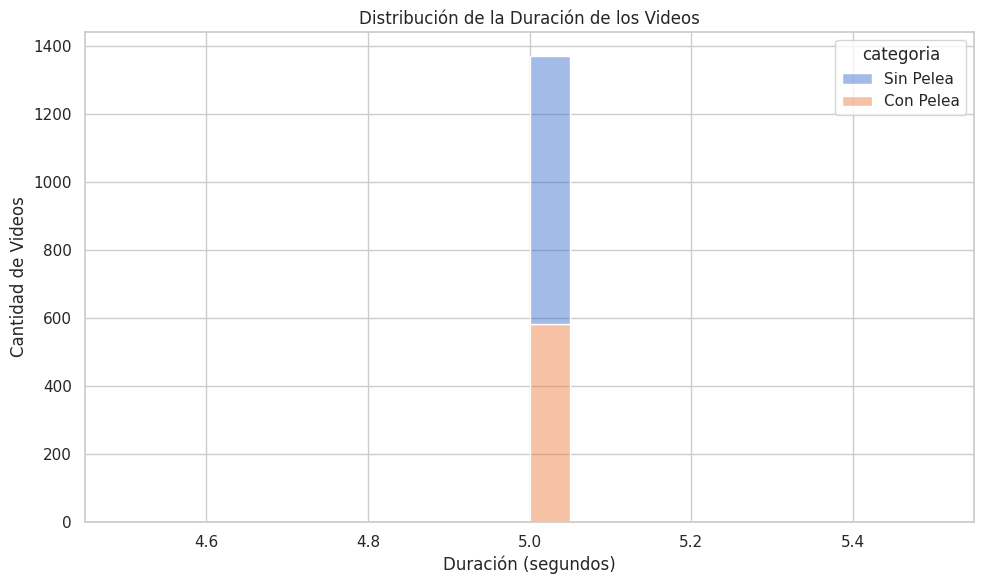

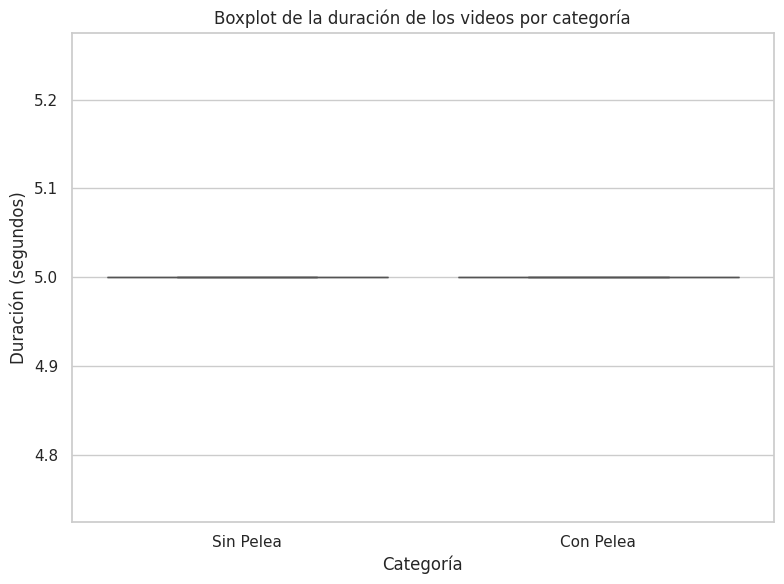

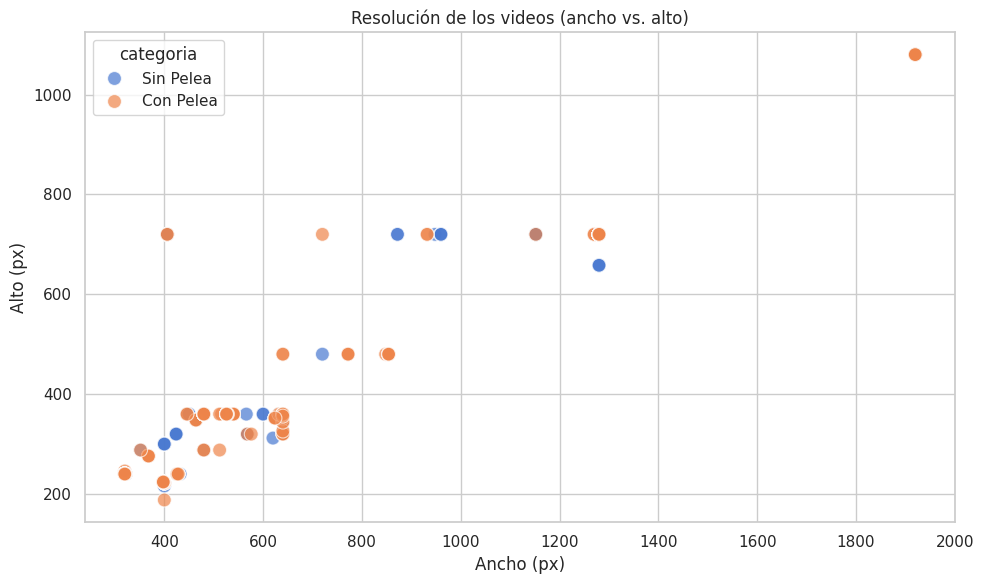

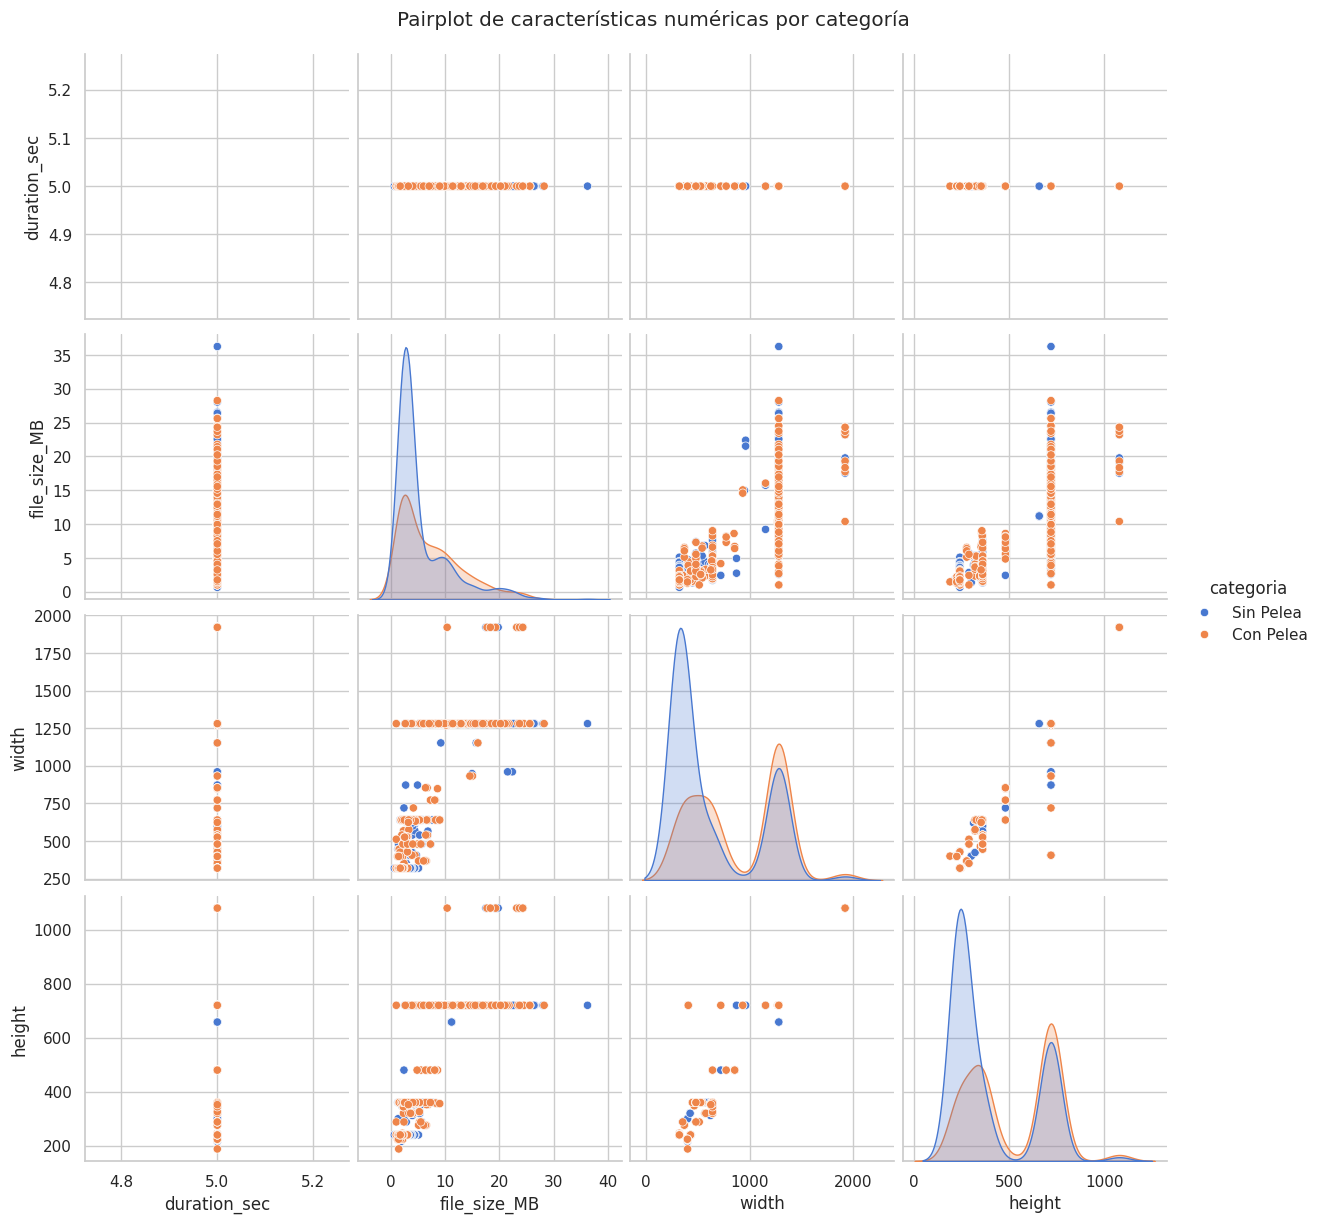

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuramos el estilo de seaborn
sns.set(style="whitegrid", palette="muted")

# -------------------------------
# Histograma de la duración de los videos por categoría
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_videos,
    x="duration_sec",
    hue="categoria",
    kde=True,         # Dibuja la curva de densidad
    bins=20,
    multiple="stack"  # Apila las barras para ver mejor la contribución de cada categoría
)
plt.title("Distribución de la Duración de los Videos")
plt.xlabel("Duración (segundos)")
plt.ylabel("Cantidad de Videos")
plt.tight_layout()
plt.show()

# -------------------------------
# Boxplot de la duración por categoría (sin outliers para mayor claridad)
plt.figure(figsize=(8, 6))
sns.boxplot(
    x="categoria",
    y="duration_sec",
    data=df_videos,
    showfliers=False  # No muestra los outliers para una visualización más limpia
)
plt.title("Boxplot de la duración de los videos por categoría")
plt.xlabel("Categoría")
plt.ylabel("Duración (segundos)")
plt.tight_layout()
plt.show()

# -------------------------------
# Scatter plot de la resolución (ancho vs. alto) por categoría
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_videos,
    x="width",
    y="height",
    hue="categoria",
    s=100,      # Tamaño de los puntos
    alpha=0.7   # Transparencia de los puntos
)
plt.title("Resolución de los videos (ancho vs. alto)")
plt.xlabel("Ancho (px)")
plt.ylabel("Alto (px)")
plt.tight_layout()
plt.show()

# -------------------------------
# Pairplot de algunas características numéricas por categoría
numeric_cols = ['duration_sec', 'file_size_MB', 'width', 'height']
sns.pairplot(
    df_videos[numeric_cols + ['categoria']],
    hue="categoria",
    height=3,
    diag_kind='kde'
)
plt.suptitle("Pairplot de características numéricas por categoría", y=1.02)
plt.show()

## Paso 5: Extraer y mostrar frames de ejemplo de algunos videos por categoría.

Número de videos sin pelea: 791
Número de videos con pelea: 582


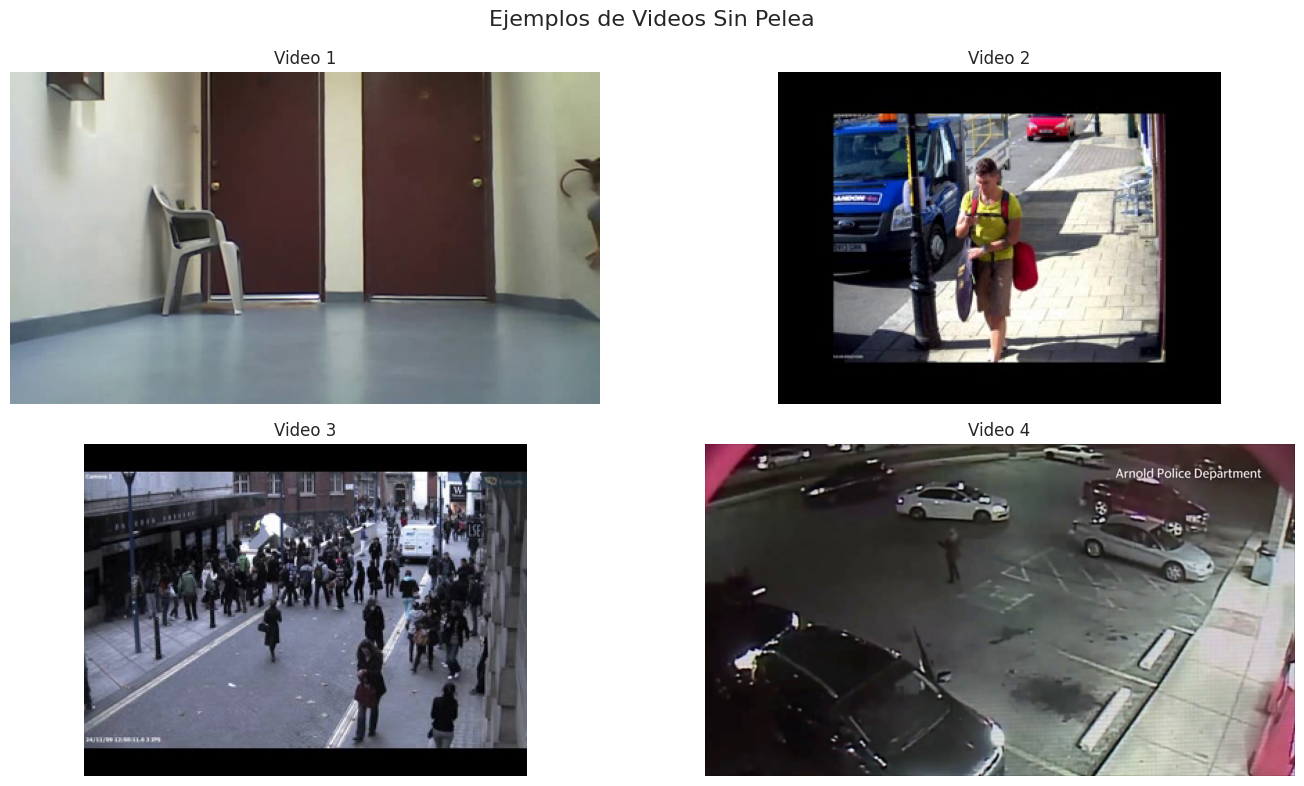

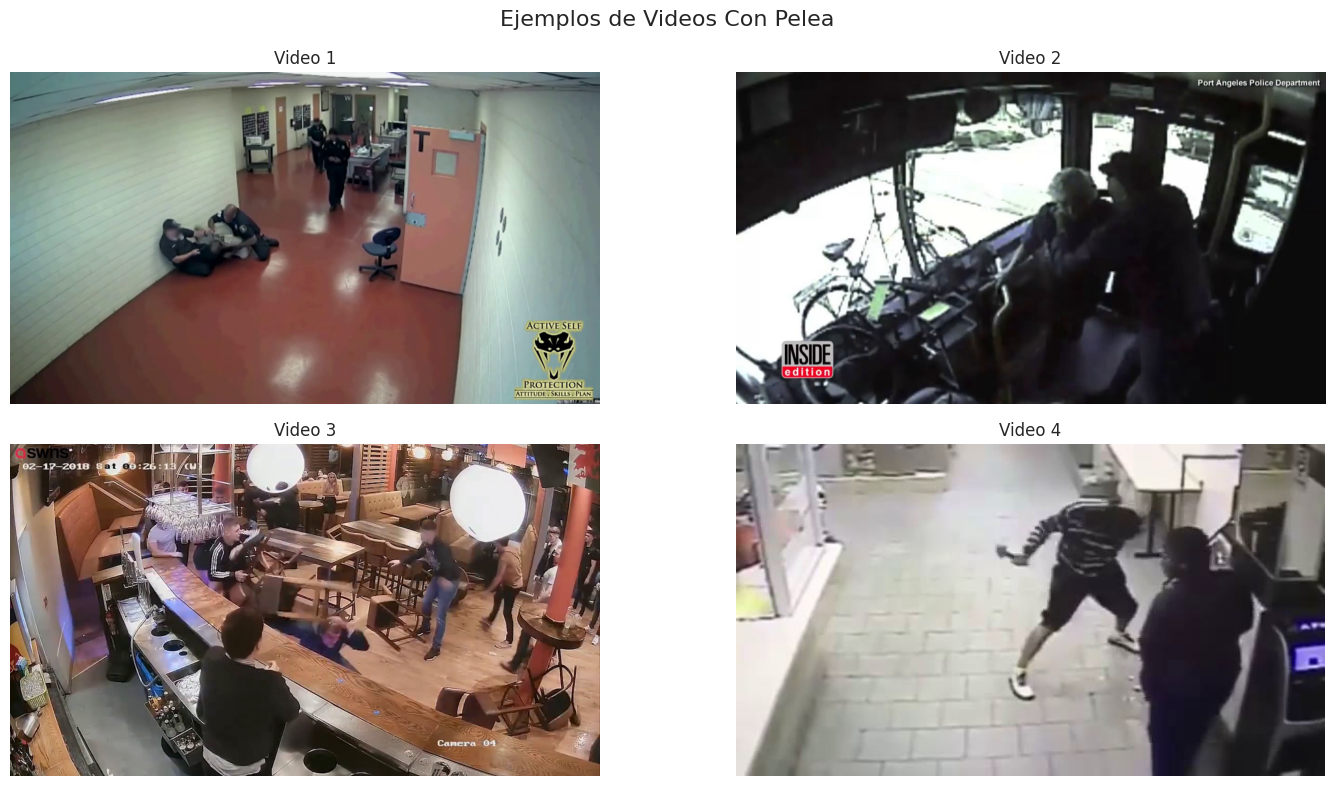

In [ ]:
# Definir las rutas de las carpetas directamente en el directorio raíz
normal_folder = '/content/Normal_Videos_for_Event_Recognition'
fight_folder = '/content/Fight'  # Actualizamos la ruta para videos de pelea

# Extensiones de video comunes
video_extensions = ('.mp4', '.avi', '.mov', '.mkv')

def list_videos(folder):
    """
    Retorna una lista de rutas de archivos de video en la carpeta,
    filtrando por las extensiones definidas.
    """
    return [os.path.join(folder, f) for f in os.listdir(folder)
            if f.lower().endswith(video_extensions)]

# Obtener listas de videos para cada categoría
normal_videos = list_videos(normal_folder)
fight_videos = list_videos(fight_folder)

print(f"Número de videos sin pelea: {len(normal_videos)}")
print(f"Número de videos con pelea: {len(fight_videos)}")

def extract_frame(video_path, position='middle'):
    """
    Extrae un frame del video.
    Por defecto, extrae el frame central. Si position es 'first', extrae el primer frame.
    Retorna la imagen en formato RGB o None si falla.
    """
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Error al abrir el video: {video_path}")
        return None

    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    if total_frames <= 0:
        cap.release()
        return None

    # Determinar qué frame extraer: frame central o el primero
    frame_id = 0 if position == 'first' else total_frames // 2

    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_id)
    ret, frame = cap.read()
    cap.release()

    if ret:
        # Convertir de BGR a RGB para una correcta visualización en matplotlib
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        return frame_rgb
    else:
        return None

def display_frame_grid(video_paths, title, max_videos=4, position='middle'):
    """
    Muestra una grilla de frames extraídos de una lista de videos.
    Se muestran hasta 'max_videos' frames.
    """
    n = min(len(video_paths), max_videos)

    # Configuración de la grilla: 1x1 para 1 video, 1x2 para 2 y 2x2 para 3 o 4 videos
    if n == 1:
        rows, cols = 1, 1
    elif n == 2:
        rows, cols = 1, 2
    else:
        rows, cols = 2, 2

    fig, axs = plt.subplots(rows, cols, figsize=(15, 8))

    # Si hay un solo subplot, convertirlo a lista para iterar de forma homogénea.
    if n == 1:
        axs = [axs]
    else:
        axs = axs.flatten()

    for i in range(n):
        frame = extract_frame(video_paths[i], position=position)
        if frame is not None:
            axs[i].imshow(frame)
            axs[i].set_title(f"Video {i+1}")
            axs[i].axis('off')
        else:
            axs[i].text(0.5, 0.5, "No se pudo extraer el frame", ha='center', va='center')
            axs[i].axis('off')

    # Ocultar subplots adicionales (si la grilla es mayor que 'n')
    for j in range(n, len(axs)):
        axs[j].axis('off')

    fig.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Mostrar ejemplos de videos sin pelea
if len(normal_videos) > 0:
    display_frame_grid(normal_videos, "Ejemplos de Videos Sin Pelea", max_videos=4, position='middle')
else:
    print("No se encontraron videos en la carpeta 'Normal_Videos_for_Event_Recognition'.")

# Mostrar ejemplos de videos con pelea
if len(fight_videos) > 0:
    display_frame_grid(fight_videos, "Ejemplos de Videos Con Pelea", max_videos=4, position='middle')
else:
    print("No se encontraron videos en la carpeta 'Fight'.")